## Statistics for Data Science Project
Jack Krebsbach and Eli Edwards

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import asyncio
from datetime import datetime
import os
import matplotlib.pyplot as plt

### Import and Preprocess data

In [2]:
user_path = "./data/users.csv"
waitlist_path = './data/waitlist.csv'

In [3]:
user_data = pd.read_csv(user_path)
waitlist_data = pd.read_csv(waitlist_path)

In [4]:
## Filter mustafa and jack
emails_to_filter = ['jack@rezafootwear.com', 'mustafa@rezafootwear.com', 'krebsbachjackson@gmail.com', 'mustisyed@hotmail.com', 'jackson.krebsbach@hope.edu','thibautfenaindev@gmail.com']

In [5]:
# Preprocess email columns
user_data['email'] = user_data['email'].str.strip().str.lower()
waitlist_data['email'] = waitlist_data['email'].str.strip().str.lower()

In [6]:
# Merge dataframes
df = pd.merge(user_data, waitlist_data, on='email', how='inner')
df = df[~df['email'].isin(emails_to_filter)]
df
# Assuming df is your DataFrame
df['lyop'] = np.where(df['lyop_x'].notna() & df['lyop_y'].notna(), df['lyop_y'], np.nan)
df['bought_shoes'] = np.where((df['completed_reservation'] == True) | (df['user_category'] == 'FOUNDER'), True, False)
df.columns

Index(['id_x', 'bc_id', 'email', 'phone_x', 'full_name', 'first_name',
       'last_name', 'hoodie_size', 'full_user', 'disabled', 'role',
       'created_at_x', 'updated_at_x', 'last_login_at', 'invite_count',
       'invited_by_x', 'user_category', 'stripe_id', 'drop_live',
       'drop_live_sms', 'id.1', 'lyop_x', 'city_x', 'description',
       'display_name', 'short_description', 'profile_picture', 'user_id',
       'created_at.1', 'updated_at.1', 'id.2', 'created_at.2', 'updated_at.2',
       'completed_reservation', 'end_time', 'start_time', 'user_id.1',
       'waitlist_id', 'unlocked', 'reactivated', 'reactivated_at', 'phone_y',
       'lyop_y', 'invited_by_y', 'count', 'created_at_y', 'updated_at_y',
       'verification_code', 'token', 'applied', 'city_y', 'applied_at', 'name',
       'id_y', 'application_reminder_count', 'email_verified',
       'phone_verified', 'shoe_size', 'application_update_count', 'accepted',
       'accepted_at', 'lyop', 'bought_shoes'],
      dtype=

In [7]:
bought_shoes = df[(df['completed_reservation'] == True)| (df['user_category'] == 'FOUNDER')]

In [8]:
df = df.copy() 
df.dropna(subset=['lyop'], inplace=True)
df['invited_by'] = df['invited_by_y']
df['city'] = df['city_x']
df['phone'] = df['phone_y']

In [9]:
columns = ['email', 'full_name', 'lyop', 'invited_by', 'city','bought_shoes']
data = df[columns]

In [10]:
data.to_csv('./outputs/data.csv',index=False)

#### Need to get City data

In [11]:
import geocoder
import requests

In [12]:
g = geocoder.google('Los Angeles', sensor=False)

In [13]:
g = geocoder.google([45.15, -75.14], method='reverse')

In [14]:
data

,email,full_name,lyop,invited_by,city,bought_shoes
69,furtickbrandon81@gmail.com,Brandon Furtick,These shoes are amazing in every way from how ...,NaN,Duluth,True
146,gala12143@aol.com,Kendall Brannon,I am inspired my rhythm and music. I light my ...,NaN,Bacliff,True
176,kelvin943451798@gmail.com,dexen,YEA,NaN,NY,True
235,aaronjleeman46@gmail.com,Aaron,Creating my own sounds musically and exploring...,NaN,Leamington Spa,True
247,finnlaccapone@gmail.com,Lucas Capone,I’m apart of a large car community where we ho...,NaN,Rockaway,True
...,...,...,...,...,...,...
26454,j.v.delcruz70120@gmail.com,Juan De La Cruz,I go through and trying new things as possible...,NaN,Menifee California,False
26455,djm3lla@gmail.com,Keven,I dj and I love being creative with new styles...,NaN,New York,False
26457,mattd666@icloud.com,Matthew,"The people around me, they inspire me to be be...",NaN,Gloucester,False
26458,seniorbenefits001@gmail.com,Leonardo Garcia,Destined for greatness,NaN,"Orlando, Florida",False


In [15]:
df = data

### Get sentiment from their application

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krebsbach/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krebsbach/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/krebsbach/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


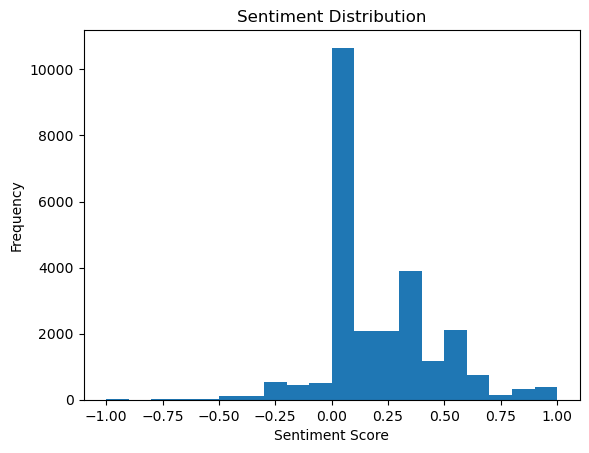

In [16]:
# Text Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['lyop'].apply(preprocess)  # Replace 'column_name' with your column name

# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['processed_text'].apply(get_sentiment)

# Visualization
plt.hist(df['sentiment'], bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [17]:
#df.rename(columns={'city': 'city_unstructured'}, inplace=True)
#df.to_csv("./outputs/processed_data.csv")

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

chrome_options = Options()
chrome_options.add_argument("--headless") 
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

CITY= 'Holland MI'

# try:
#     driver.get(f"https://www.bing.com/maps?q={CITY}")
#     wait = WebDriverWait(driver, 10)
# 
#    # Wait for the page to load and locate elements
#     wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'b_factrow')))
#     factrow_elements = driver.find_elements(By.CLASS_NAME, 'b_factrow')
# 
#     # Extract and print information from each element
#     for element in factrow_elements:
#         print(element.text)
# 
# except Exception as e:
#     print("An error occurred:", e)
# 
# finally:
#     # Close the browser
#     driver.quit()


In [26]:
# Asynchronously process the first 5 cities

# async def process_all_batches(df):
#     batch_size = 5
#     tasks = []
#     for batch in np.array_split(df, np.ceil(len(df) / batch_size)):
#         task = asyncio.create_task(process_batch(batch,df))
#         tasks.append(task)
#     await asyncio.gather(*tasks)
# async def proccess_first_batch():
#     batch_size = 5
#     tasks = []
#     # Limit to the first batch only
#     first_batch = np.array_split(df, np.ceil(len(df) / batch_size))[0]
#     task = asyncio.create_task(process_batch(first_batch))
#     tasks.append(task)
#     await asyncio.gather(*tasks)
# 

In [49]:
def get_structured_data(driver, city):
    structured_data = {'Country': None, 'Region': None, 'City': None, 'State': None}
    try:
        driver.get(f"https://www.bing.com/maps?q={city}")
        wait = WebDriverWait(driver, 10)
        # Wait until the fact rows are present
        wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'b_factrow')))
        factrow_elements = driver.find_elements(By.CLASS_NAME, 'b_factrow')

        for element in factrow_elements:
            # Safely split the text and assign values
            text_parts = element.text.split(':')
            if len(text_parts) == 2 and text_parts[0] in structured_data:
                structured_data[text_parts[0]] = text_parts[1].strip()

    except Exception as e:
        print(f"An error occurred for {city}: {e}")

    return structured_data

In [50]:
# Asynchronous function to process a batch of cities
async def process_batch(batch,df):
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    for index, row in batch.iterrows():
        data = get_structured_data(driver, row['city_unstructured'])
        print(f"Processed Index: {index}")
        for key, value in data.items():
            df.at[index, key] = value
    current_time = datetime.now().strftime("%Y%m%d%H%M%S")
    df.to_csv(f'./outputs/temp/{current_time}.csv', index=False)
    driver.quit()

In [61]:
async def process_all_batches_only_missing_rows(df, n_rows):
    batch_size = 50
    tasks = []
    df = df.assign(**{col: None for col in ['Country', 'Region', 'City', 'State'] if col not in df.columns})
    
    os.makedirs('./outputs/temp', exist_ok=True)

    # Filter rows where all the specified columns have missing values and limit the rows
    missing_values_df = df[df[['Country', 'Region', 'City', 'State']].isna().all(axis=1)]
    missing_values_df = missing_values_df.head(n_rows)

    # Process these rows in batches if there are any
    if not missing_values_df.empty:
        for batch in np.array_split(missing_values_df, np.ceil(len(missing_values_df) / batch_size)):
            task = asyncio.create_task(process_batch(batch,df))
            tasks.append(task)
        await asyncio.gather(*tasks)

    return df

In [63]:
directory = "./outputs/temp"
df = pd.read_csv(os.path.join(directory, max(f for f in os.listdir(directory) if f.endswith('.csv'))))
#df = pd.read_csv('./outputs/data.csv')

In [64]:
loop = asyncio.get_event_loop()
#loop.create_task(proccess_first_batch())
out = loop.create_task(process_all_batches_only_missing_rows(df,n_rows=2000))

In [65]:
out

<Task finished name='Task-41' coro=<process_all_batches_only_missing_rows() done, defined at /var/folders/gf/bt25hkv172n_bttx0h72_6340000gn/T/ipykernel_48959/423986680.py:1> result=       Unname... x 13 columns]>